## Intro

1. Submit this task as a Jupyter Notebook (.ipynb file) downloaded from your team's Google Colab. Make sure you made a copy of this notebook and opened it via UCU email address.

2. Please use cv2 standard methods for reading and resizing the images, and matplotlib or cv2 imshow function for displaying it.

3. There should be only one submission per team. However, don't forget to choose a person from your team who would submit the task, and **make sure that the names of all team members are listed in the notebook**. Teammates not mentioned in the notebook will not be graded for this lab.  

4. Provide a **work breakdown** structure estimating the efforts of each team member. Please provide it at the top of your notebook.  

5. Your final grade will be a product of grade for the coding and explanatory part and coefficient for the oral defense (will be announced later). Please note that your final mark for this assignment will consist of three components:
  *   Coding part
  *   Explanations
  *   Oral defense (to be scheduled later)

  Make sure you include detailed theoretical explanations where necessary.

6. **Important**: during the implementation, you are welcomed to use `cv2` methods, but you must also implement the transformation matrices yourself (except image **reading**, **resizing** and **displaying**). Finally, as a successful result, you can demonstrate that the outputs of both approaches coincide!

7. The final deadline is **February 27 2024, 23:59**. If you submit your assignment after this time and date, it will not be graded.




In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

#### Work breakdown (example):

Sofia Dyshleva: 1.1-1.3 \\
Daryna Kuzyshyn: 1.4-1.6 \\
Kostyantyn Savorona: 2 task




## 1.

Recall that a linear transformation is a mapping $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ such that
$\forall c_1, c_2 \in \mathbb{R}, \mathbf{u}_1, \mathbf{u}_2 \in \mathbb{R}^n$  
$T(c_1 \mathbf{u}_1 + c_2 \mathbf{u}_2) = c_1T(\mathbf{u}_1) + c_2T(\mathbf{u}_2)$.  

In this lab you will study some of the common transformations in $\mathbb{R}^2$, derive their general matrix form, explain what a resulting image will look like and apply transformations to the vectors and pictures.

Each linear transformation can be represented as a matrix. In case of an image linear transformation is applied to a pixel position on xy-plane, transforming its coordinates $(x, y)$ to $(x', y')$ but retaining the color. However, the image is usually represented as an array of pixels, thus having the dimension (image height, image width, 3) if the color is represented in RGB system. You can use *warpAffine()* function from cv2 to perform transformations on the image, or you can implement a function that manipulates each pixel's position given an array of pixels and calculate the transformation matrix on your own.

### 1.1 Image preparation

First, load image 1, resize it to a more convenient form, and examine its representation.

The shape of the image is Ellipsis
Initial shape  (500, 500, 3)
Shape after resizing (400, 400, 3)


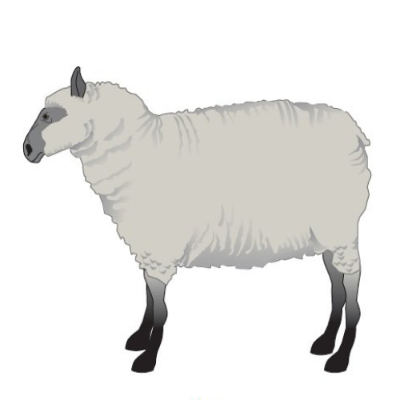

In [ ]:
# Load images

##### YOUR CODE STARTS #####

img1_path = 'sheep.png'
image = cv.imread(img1_path)
resized = cv.resize(image, (400,400))

print(f"The shape of the image is {...}")
print("Initial shape ", image.shape)
print("Shape after resizing", resized.shape)
cv2_imshow(resized)

##### YOUR CODE ENDS #####

 What is this image's shape? What do the values mean?

1. The first parameter - height (500px)
2. The second parameter - width (500px)
3. 3 RGB chanels - red, green, blue

### 1.2 Rotation matrix

Rotation is a linear transformation of some space that preserves at least one point. An example of rotation by angle $\psi$ on xy-plane is depicted on the image below:   
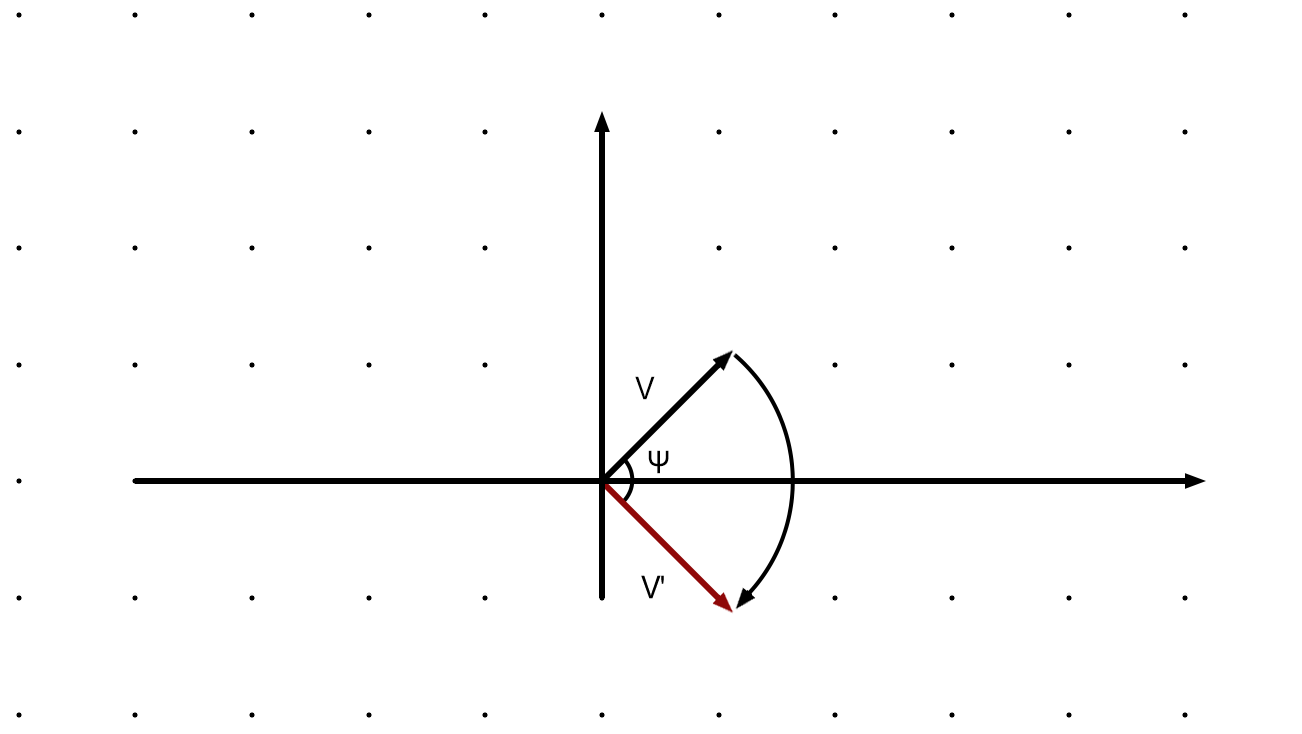

What is the transformation matrix that corresponds to rotation by a generic angle $\phi$?




Matrix  rotates the coordinate system through a counterclockwise angle 𝜙.

$$V=(x, y)$$ in polar coordinates

$$x = r \cos(v)$$
$$y = r \sin (v)$$

Similarly, expressing $$(x', y')$$ in polar form
$$x' = r \cos (v - 𝜙 )$$
$$y' = r \sin (v - 𝜙 )$$

$$x' = r\cos v \cos 𝜙  + r\sin v \sin 𝜙 $$
$$y' =  r\sin v\cos 𝜙 - r\cos v \sin 𝜙$$

$$x' = x \cos 𝜙  + y v \sin 𝜙 $$
$$y' =  y \cos 𝜙 - x \sin 𝜙=- x \sin 𝜙+y \cos 𝜙$$


\begin{bmatrix}
\cos 𝜙 & \sin 𝜙\\
-\sin 𝜙 & \cos 𝜙
\end{bmatrix}

\begin{align*}
\
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
\cos 𝜙 & \sin 𝜙\\
-\sin 𝜙 & \cos 𝜙
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\
\end{align*}

For rotating images without centre changed:

In order to rotate a pixel at $(x, y)$ around an arbitrary point $(x_0, y_0)$ the equations become:

$$x'=x_0+(x−x_0)\cos𝜙+(y-y_0)\sin𝜙$$


$$y'=y_0−(x−x_0)\sin𝜙+(y-y_0)\cos𝜙$$

for nonclockwise matrix the rotation matrix around the center looks like:
\begin{align*}
M = \begin{bmatrix} \alpha & \beta & (1-\alpha)\cdot c_x-\beta \cdot c_y\\ -\beta & \alpha & \beta\cdot c_x+(1-\alpha) \cdot c_y \end{bmatrix}
\end{align*}



Your next task is to implement a function that calculates the rotation matrix and apply it to a vector to rotate it by $45^\circ$.
First, construct the rotation matrix:

In [ ]:
# Create rotation matrix
import math

def get_rotation_matrix(phi):
  ##### YOUR CODE STARTS #####
  angle = math.radians(phi)
  transformation_matrix = np.array([[math.cos(angle), math.sin(angle)],
                                    [-math.sin(angle), math.cos(angle)]])
  ##### YOUR CODE ENDS #####
  return transformation_matrix

phi = 45

M = get_rotation_matrix(phi)
print("Rotation matrix is")
print(M)

Rotation matrix is
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


Second, we'll apply the transformation to a vector. Let's check what our vector looks like now:


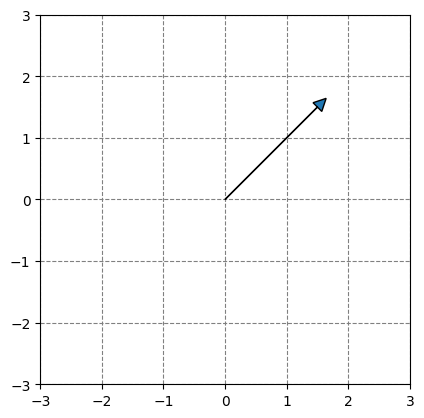

In [ ]:
A = np.array([0, 0])
B1 = np.array([1.5, 1.5])

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

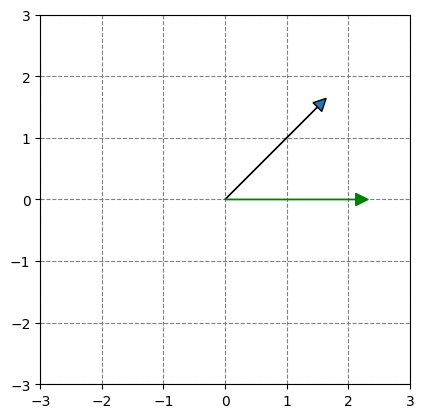

In [ ]:
# Apply rotation to the vector AB1 to get vector AB2

##### YOUR CODE STARTS #####
A = np.array([0, 0])
B1 = np.array([1.5, 1.5])
#multiply rotation matrix with B1
B2 = np.matmul(M, B1)
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

You can also rotate images! There is image rotated by 45 degrees. Rotate it back with transformation matrix, so it will look like **sheep.png**:

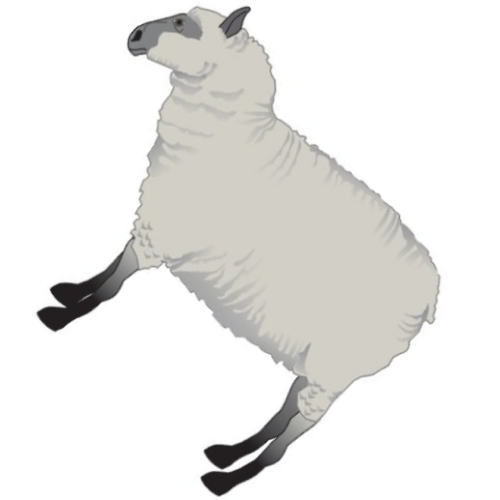

In [ ]:
rotated_img = cv.imread("./rotated_sheep.png")
cv2_imshow(rotated_img)

Rotation matrix for img is
[[   0.70710678    0.70710678 -103.55339059]
 [  -0.70710678    0.70710678  250.        ]]
[[   0.70710678    0.70710678 -103.55339059]
 [  -0.70710678    0.70710678  250.        ]]


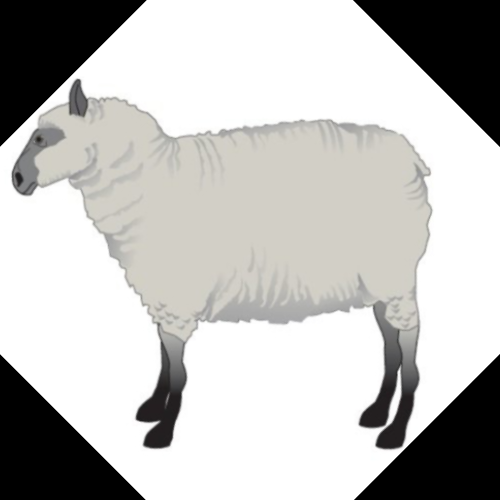

In [ ]:
##### YOUR CODE STARTS #####
def get_rotation_matrix_img(img, phi):
  angle = math.radians(phi)
  xcentre=img.shape[1]//2
  ycentre=img.shape[0]//2
  transformation_matrix = np.array([[math.cos(angle), math.sin(angle),(1 - math.cos(angle)) * xcentre - math.sin(angle) * ycentre ],
                                    [-math.sin(angle), math.cos(angle),math.sin(angle) * xcentre + (1 -  math.cos(angle)) * ycentre]
                                    ])
  return transformation_matrix

phi = 45

M = get_rotation_matrix_img(rotated_img,phi)
print("Rotation matrix for img is")
print(M)


xcentre=rotated_img.shape[1]//2
ycentre=rotated_img.shape[0]//2
img_center=(xcentre,ycentre)
# analogue from cv library
matrix =  cv.getRotationMatrix2D(img_center, 45, 1)
print(matrix)

restored_img = cv.warpAffine(rotated_img, M, (500, 500),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)
##### YOUR CODE ENDS #####

cv2_imshow(restored_img)

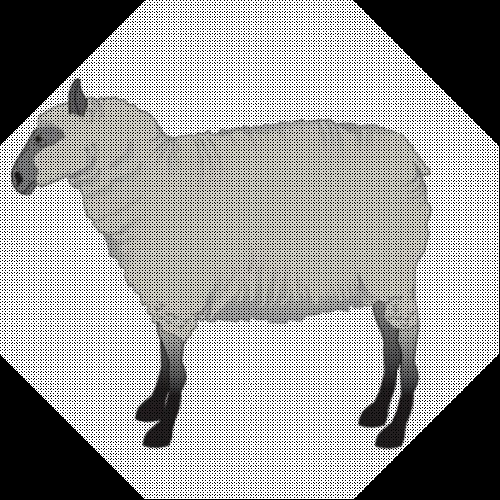

In [ ]:
# done but pixels are seen((

# rotate the image
def rotator(img, angle):
  h=img.shape[0]
  w=img.shape[1] #width and height are crisscrossed
  rotation_matrix=get_rotation_matrix(angle)
  # empty array to hold the rotated image
  result = np.zeros(img.shape, dtype="u1")

  # fix position of center so the image does not fly
  xcenter = w / 2
  ycenter = h / 2

  # multiply each pixel of given image by rotatation matrix
  for row in range(h):
    for col in range(w):
        # distance from current position in loop to center
        current_coordinate = np.matmul(rotation_matrix, np.array([col - xcenter, row - ycenter]))

        # new coordinates
        x=xcenter+current_coordinate[0]
        y=ycenter+current_coordinate[1]

        # check whether pixel is not out of image
        if 0 <= x <= w-1 and 0 <= y <= h-1:
          result[int(y), int(x)] = rotated_img[row, col]
  return result

cv2_imshow(rotator(rotated_img, 45))






### 1.3 Scaling matrix

Scaling is a tranformation that enlarges or diminishes objects by a factor. For scaling in 2D space a factor can be represented as a vector $(x_s, y_s)$ where $x_s$ and $y_s$ are scaling factors for each respective axis (those factors don't have to be equal). On the picture below, V' represents vector V scaled by a factor (0.5, 1) and V'' - by (0.5, 0.5).
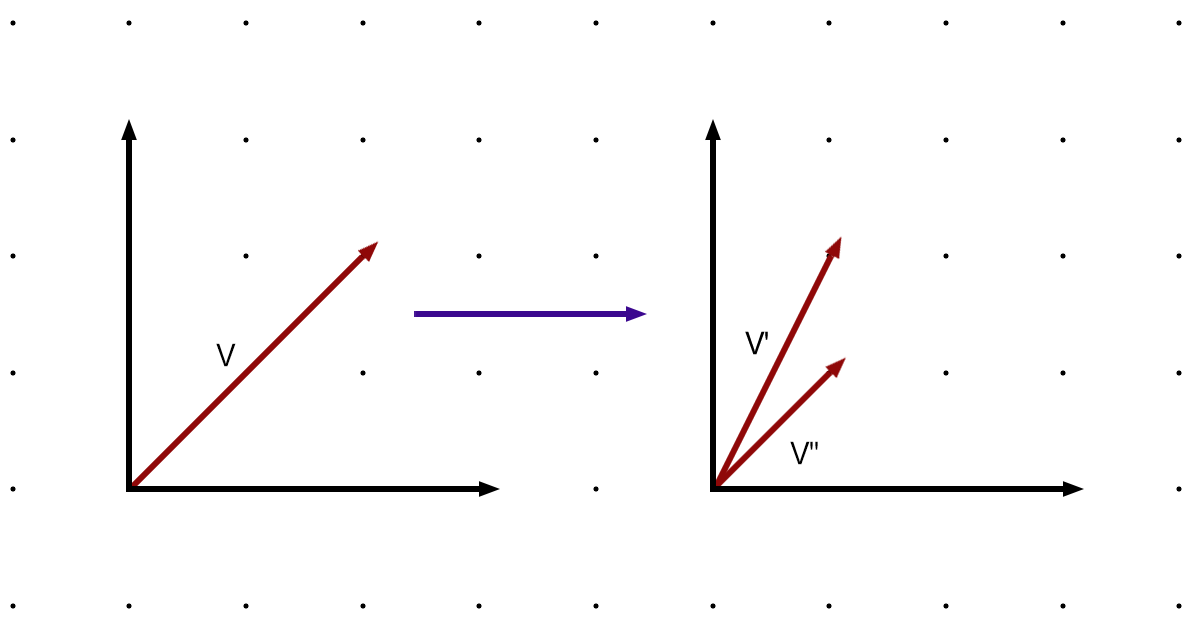

In this part, you should derive a general form for a scaling matrix and apply scaling by a factor of (1, 0.5) to the vector. First, explain how you derive the scaling matrix:

$$V=(x, y)$$
$$V'=(x', y')=(x*k_x, y*y_x)$$


\begin{align*}
\
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
k_x & 0\\
0 & k_y
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\
\end{align*}

In [ ]:
##### YOUR CODE STARTS #####
def get_scaling_matrix(scale_factor_x, scale_factor_y):
  return np.array([[scale_factor_x, 0],
                                    [0, scale_factor_y]])

M2 = get_scaling_matrix(1, 0.5)

##### YOUR CODE ENDS #####
print("Scaling matrix is")
print(M2)

Scaling matrix is
[[1.  0. ]
 [0.  0.5]]


Second, apply scaling by (1, 0.5) to the vector.

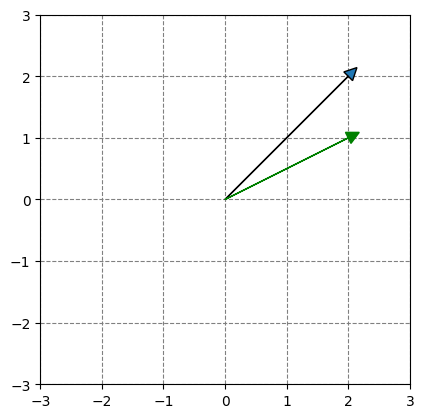

In [ ]:
# Apply scaling to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = np.array([0, 0])
B1 = np.array([2, 2])
B2 = np.matmul(M2, B1)
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

# Now, apply scaling by some factor to the image (scaled by a factor of (1, 0.5) before) to restore the **sheep.png**:

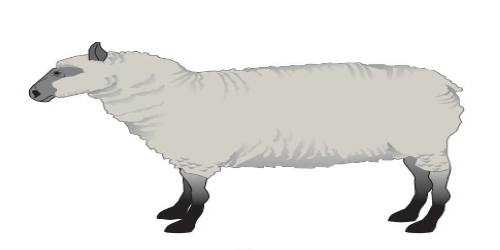

(250, 500, 3)

In [ ]:
scaled_img = cv.imread("./scaled_sheep.png")
cv2_imshow(scaled_img)
scaled_img.shape

Scaling matrix is
[[1. 0. 0.]
 [0. 2. 0.]]


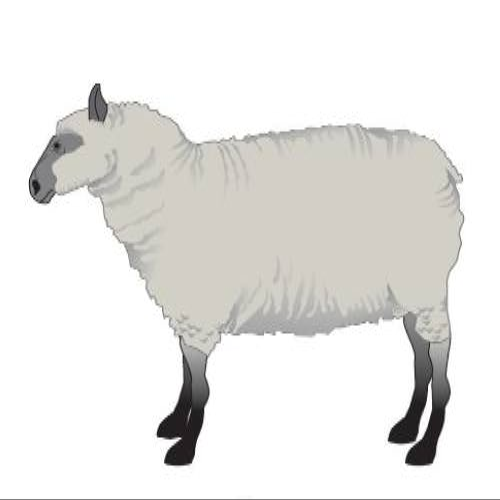

In [ ]:
##### YOUR CODE STARTS #####
def get_scaling_matrix_img(scale_factor_x, scale_factor_y):
  zero=0
  return np.array([[scale_factor_x, 0, 0],
                                    [0, scale_factor_y, 0]], dtype=np.float32)

scaling_matrix = np.linalg.inv(np.array([[1, 0],
                                    [0, 0.5]]))
print("Scaling matrix is")
print(get_scaling_matrix_img(scaling_matrix[0][0],scaling_matrix[1][1]))
restored_img2 = cv.warpAffine(scaled_img, get_scaling_matrix_img(scaling_matrix[0][0],scaling_matrix[1][1]), (500, 500))

##### YOUR CODE ENDS #####
cv2_imshow(restored_img2)

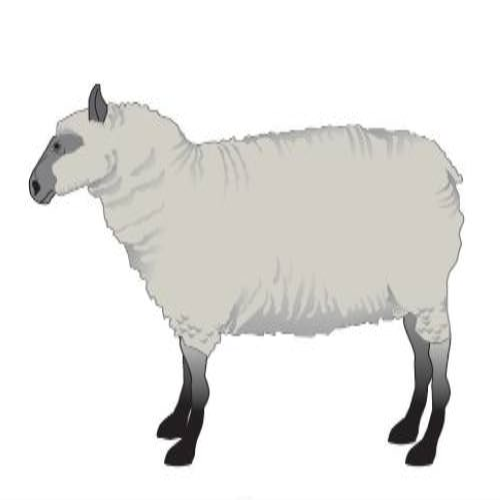

In [ ]:
# resize using cv library only

##### YOUR CODE STARTS #####
restored_img = cv.resize(scaled_img,(500,500), interpolation=cv.INTER_LINEAR)
##### YOUR CODE ENDS #####
cv2_imshow(restored_img)

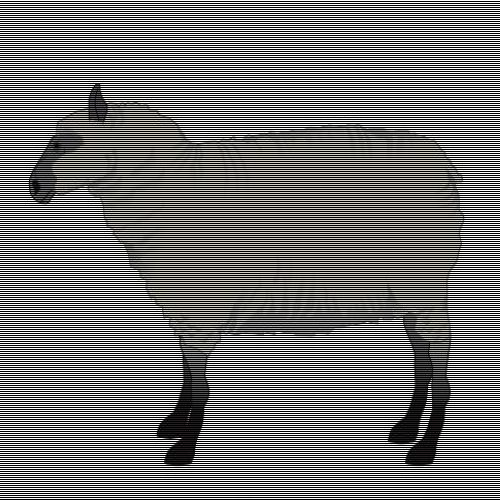

In [ ]:
# scale image
# inverse multiplied by (x`, y`)

def scaling(scalars, image):
  inverse = np.linalg.inv(get_scaling_matrix(scalars[0],scalars[1]))
  old_height=image.shape[0]
  old_width=image.shape[1]
  #find new shape by multipliing scaled img on inversed scaling matrix
  new_wh = np.matmul(inverse, np.array([old_width, old_height])
  )
  # zero matrix to store the result image
  result = np.zeros((int(new_wh[0]), int(new_wh[1]), image.shape[2]))

  #iter by each pixel
  for h in range(old_height):
      for w in range(old_width):
        #change location of each pixel
        current = np.matmul(inverse, np.array([w, h]))
        x, y = int(current[0]), int(current[1])
        if (0<=x<=new_wh[1]-1) and (0<=y<=new_wh[0]-1):
                  result[y, x] = image[h, w]

  return result


scalars=[1, 0.5]
cv2_imshow(scaling(scalars, scaled_img))



### 1.4 Shear matrix

Horizontal shearing moves each point in a fixed direction by distance proportional to y-coordinate of the point. Shear map changes angles and lengths of line segments.

In this part, you needs to build a shearing matrix, find a transformation matrix that moves the point $(x, y)$ to $(x+1.5y, y)$, and apply it to the vector and the image. First, explain how do you build a matrix that corresponds to a shearing transformation:

To do the shearing we need to determine the axis along which we intend to apply shearing. Suppose we choose for shearing along the x-axis. For instance, we might choose to shear each point based on its y-coordinate. To do so we use a shear parameter, usually represented by S, which determines the extent of the shearing effect. This parameter(S) sets the ratio between the sheared distance and the y-coordinate of the point.
For horizontal shearing, the matrix representing the transformation of shifting each point in a fixed direction by an distance proportional to its y-coordinate is as follows:

 \begin{bmatrix}
1 & S \\
0 & 1
\end{bmatrix}

where S is the shear parameter. In our case to transform the point (x, y) to (x + 1.5y, y), we can set s = 1.5 and construct the shear matrix as follows:

 \begin{bmatrix}
1 & 1.5 \\
0 & 1
\end{bmatrix}

To apply this shear transformation to a vector or an image, we can simply multiply each point's coordinates by the shear matrix. For example, to apply the transformation to a point (x, y), we can compute:

$$\\ $$
$$\\ $$
$$S*
\left[
\begin{array}{cccccccc}
x \\
y \\
\end{array}
\right] =
\left[
\begin{array}{cccccccc}
x + 1.5y \\
y \\
\end{array}
\right] \
$$

Second, implement a function for constructing such a matrix:

In [ ]:
##### YOUR CODE STARTS #####
def get_horizontal_shear_matrix(factor):
  return np.array([[1., 0.],
                     [-factor, 1.]])

M3 = get_horizontal_shear_matrix(1.5)
##### YOUR CODE ENDS #####
print("Shearing matrix is")
print(M3)

Shearing matrix is
[[ 1.   0. ]
 [-1.5  1. ]]


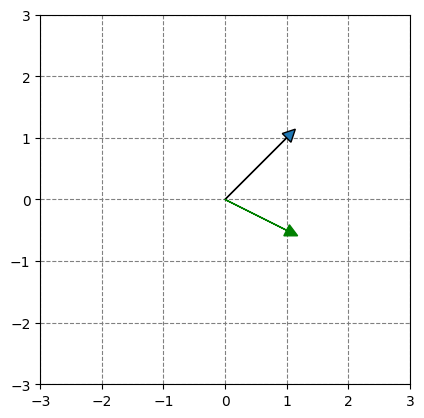

In [ ]:
# Apply shearing to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = np.array([0, 0])
B1 = np.array([1, 1])
B2 = np.dot(M3, B1)
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Finally, apply this shearing transformation to the image (which was sheared before with matrix M3) to restore **sheep.png**.

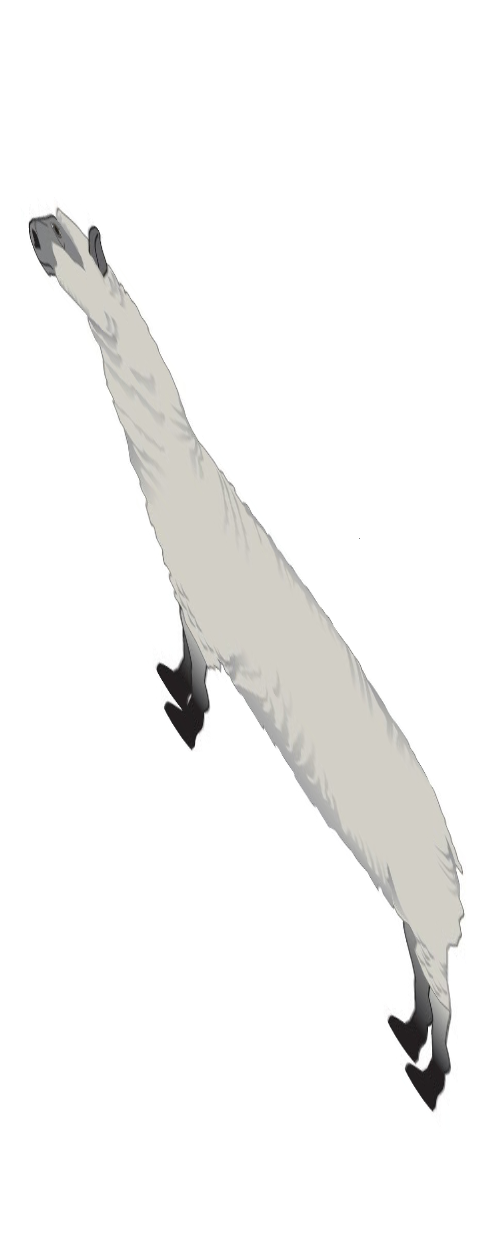

In [ ]:
sheared_img = cv.imread("./sheared_sheep.png")
cv2_imshow(sheared_img)

[[ 1.   0.   0. ]
 [-1.5  1.   0. ]]


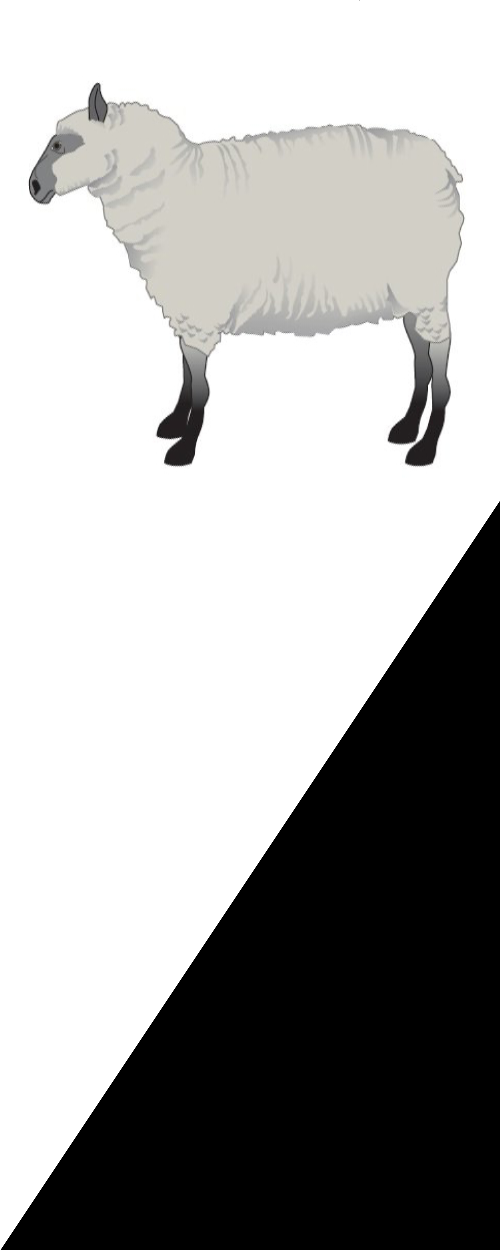

In [ ]:
##### YOUR CODE STARTS #####
shear_factor = 1.5
M_shear = np.column_stack((get_horizontal_shear_matrix(shear_factor), [0., 0.]))
print(M_shear)

rows, cols = sheared_img.shape[:2]
restored_img = cv.warpAffine(sheared_img, M_shear, (cols, rows))
##### YOUR CODE ENDS #####
cv2_imshow(restored_img)

### 1.5 Translation matrix

Translation is a transformation that moves every point of a figure by a fixed distance.


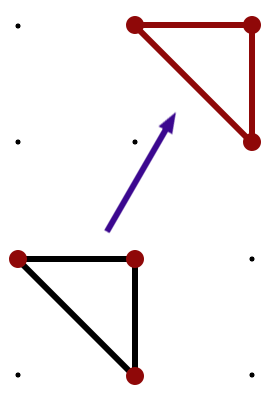

Here, you should build a translation matrix and apply translation by $(20, 25)$ to the vector. Start from explaining how to construct a translation matrix:

To form a translation matrix, we can begin with an identity matrix and then adjust the values in the last column to encode the translation components. For instance, in the case of a translation by (tx, ty), the resulting translation matrix T:

\begin{bmatrix}
1 & 0 & tx \\
0 & 1 & ty \\
0 & 0 & 1
\end{bmatrix}

To implement this transformation on a 2D point (x, y), we can express the point as a vector in homogeneous coordinates (x', y', 1) and then multiply it by the translation matrix T to derive the transformed vector (x'', y'', 1), where x''= x+tx and y''=y+ty.


Then, implement a function that produces such a matrix:

In [ ]:
##### YOUR CODE STARTS #####
def get_translation_matrix(translation_factor_x, translation_factor_y):
  return np.array([
      [1., 0., translation_factor_x],
      [0., 1., translation_factor_y],
      [0., 0., 1.]
      ])

M4 = get_translation_matrix(20, 25)
##### YOUR CODE ENDS #####
print("Translation matrix is")
print(M4)

Translation matrix is
[[ 1.  0. 20.]
 [ 0.  1. 25.]
 [ 0.  0.  1.]]


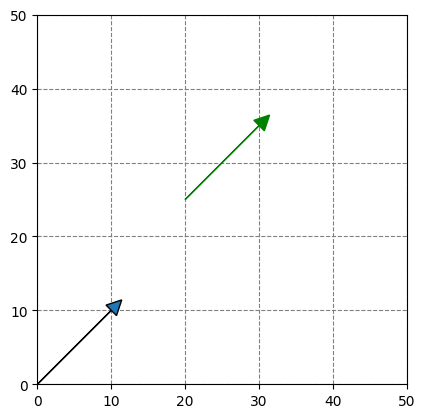

In [ ]:
# Apply translation to the vector A1B1 to achieve vector A2B2

##### YOUR CODE STARTS #####
A1 = np.array([0, 0])
B1 = np.array([10, 10])
A1_3 = np.append(A1, [1])
B1_3 = np.append(B1, [1])

A2 = np.matmul(M4, A1_3)[:2]
B2 = np.matmul(M4, B1_3)[:2]
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A1[0], A1[1], B1[0], B1[1], head_width=2, head_length=2)
ax.arrow(A2[0], A2[1], B2[0]-A2[0], B2[1]-A2[1], head_width=2, head_length=2, color='green')
plt.ylim(0,50)
plt.xlim(0,50)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Finally, apply the translation to the image (translated by (20, 25) before) to restore **sheep.png**.






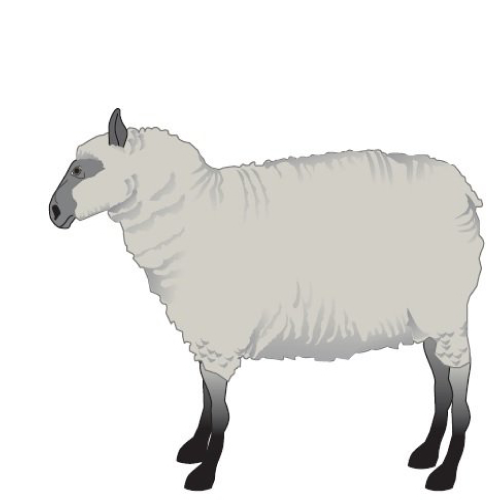

In [ ]:
translated_img = cv.imread("./translated_sheep.png")
cv2_imshow(translated_img)

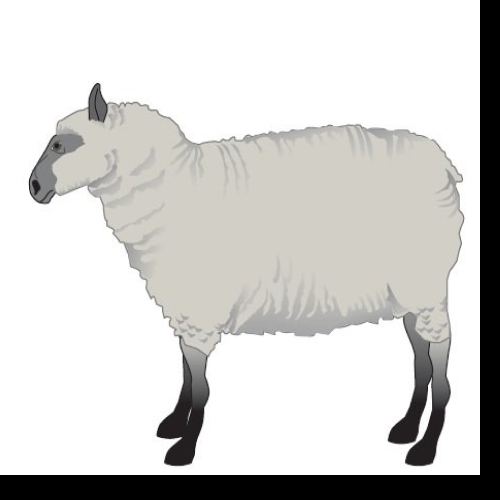

In [ ]:
##### YOUR CODE STARTS #####
M4[:2][0][2] = -20
M4[:2][1][2] = -25
restored_img = cv.warpAffine(translated_img, M4[:2], (500, 500))
##### YOUR CODE ENDS #####
cv2_imshow(restored_img)

### 1.6 Mirror symmetry
Vertical mirror symmetry maps coordinates $(x, y)$ to $(-x,y)$.

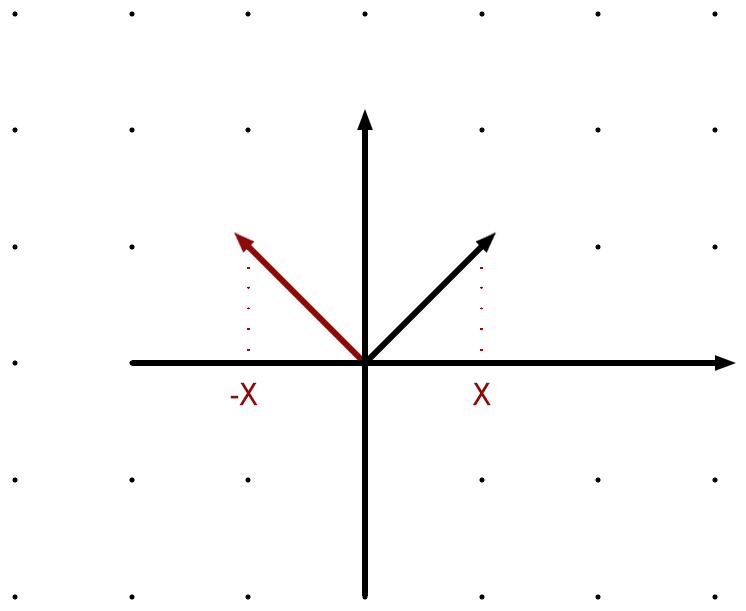

As in the previous parts, you need to provide the expanation, implement a function that produces a vertical symmetry matrix, and apply it to the vector and to the image.


A vertical symmetry or reflection is a transformation that flips the points of a figure or image over a vertical line. If we assume the vertical line to be the y-axis, the matrix can be built by multiplying each point's x-coordinate by -1. This resulting matrix will reflect the figure or image across the y-axis.

In [ ]:
##### YOUR CODE STARTS #####
def get_horizontal_mirror_marix():
  return  np.array([[-1., 0., 0.],
                     [0., 1., 0.],
                     [0., 0., 1.]])

M5 = get_horizontal_mirror_marix()
##### YOUR CODE ENDS #####
print("Mirroring matrix is")
print(M5)

Mirroring matrix is
[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


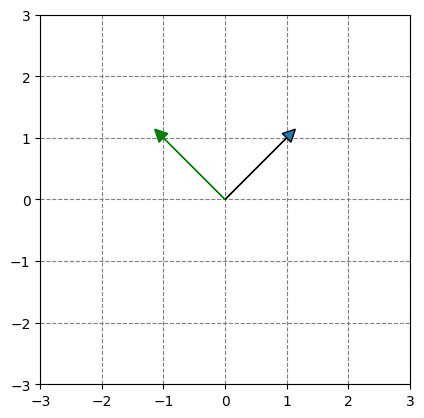

In [ ]:
# Apply mirroring to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = np.array([0, 0])
B1 = np.array([1, 1])
B2 = np.dot(M5, np.append(B1, 1))[:2]
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Apply a vertical symmetry matrix to restore **sheep.png**.

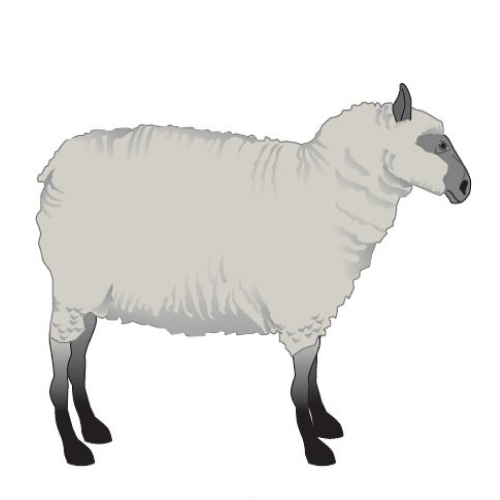

In [ ]:
mirrored_img = cv.imread("./mirrored_sheep.png")
cv2_imshow(mirrored_img)

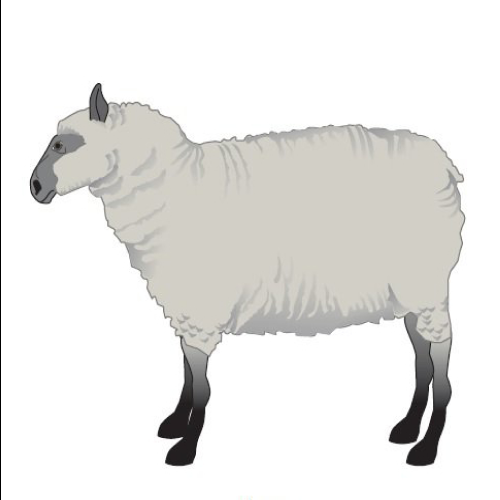

In [ ]:
##### YOUR CODE STARTS #####
matrix = np.array([[-1.0, 0.0, 500.0], [0.0, 1.0, 0.0]])
restored_img = cv.warpAffine(mirrored_img, matrix, (500, 500), flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)
# ##### YOUR CODE ENDS #####
cv2_imshow(restored_img)


## 2.

### 2.1 Perspective shift matrix

You will need to use img2.jpg for this task. Load and resize it using the same commands you used for preparing img1.

The main goal of perspective transformation (or perspective rectification) is to synthesize a perspective-free view of an object given a photo taken at an angle.   

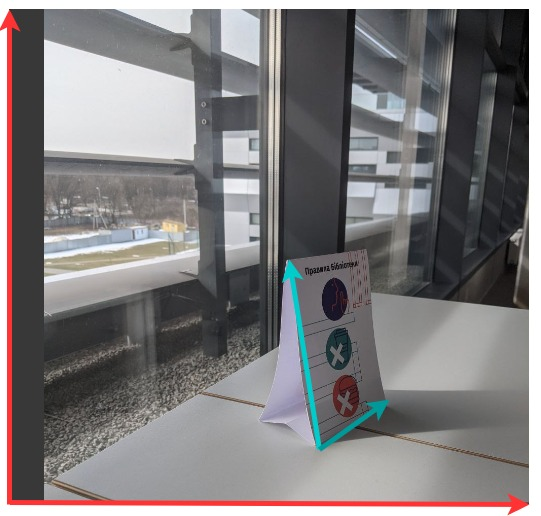

As you see on the picture above, the initial picture has a standard basis of red vectors. We want to transform all of the vectors in the picture so that the blue vectors will become the new basis.

To find this transformation matrix, you need to choose 4 points on the input image and corresponding points on the output image (3 of these points should not be collinear).In this case, the transformation matrix is a 3 by 3 matrix that satisfies the following equation, where ($x_i$, $y_i$) is the source vector and ($u_i$, $v_i$) is  the destination vector:

$u_i = \dfrac{c_{00}*x_i + c_{01}*y_i + c_{02}}{ c_{20}*x_i + c_{21}*y_i + c_{22}}$

$v_i = \dfrac{c_{10}*x_i + c_{11}*y_i + c_{12}}{c_{20}*x_i + c_{21}*y_i + c_{22}}$

In other words, we want to find a transformation that maps each of our initial 4 points $(x_i,y_i)$ to 4 points with new coordinates $(u_i, v_i)$.

Find coefficients $c_{ij}$ via solving the linear system containing source and destination coordinates and nine $c$ coefficients with numpy methods and apply it to an image so that the sign is clearly visible.
(Hint: $c_{22} = 1$)

First, start from explaining how the system was constructed.

So, we can construct the matrix in the following way:
- Source and destiantion points: we can start with 4 source points - this is 4 ends of our red vector, so we take $(0,0)$ point as the origin, $(0, rows) $ vector as a top-left point, $(cols, 0)$ vectors as the down-right point and $(cols, rows)$ vector as the point of the right-top. Source points were computed with help of additional sources as we know the size of the image, but the approach was the same.
- After that, we can construct the $8x8$ matrix Am, $8x1$ vector B and solve the system $Ax = B. To do this, let's rewrite our eqautions in the next form:

$$u_i = \dfrac{c_{00}*x_i + c_{01}*y_i + c_{02}}{ c_{20}*x_i + c_{21}*y_i + c{22}}$$
$$u_i({ c_{20}*x_i + c_{21}*y_i + c{22}}) = {c_{00}*x_i + c_{01}*y_i + c_{02}}$$

$$v_i = \dfrac{c_{10}*x_i + c_{11}*y_i + c_{12}}{c_{20}*x_i + c_{21}*y_i + c_{22}}$$
$$v_i({c_{20}*x_i + c_{21}*y_i + c_{22}}) = {c_{10}*x_i + c_{11}*y_i + c_{12}}$$

So, the equation $Ax=B$ will look like this:
$$
\begin{pmatrix}
x_0 & y_0 & 1 & 0 & 0 & 0 & -x_0 * u_0 & -y_0 * u_0\\
0 & 0 & 0 & x_0 & y_0 & 1 & -x_0 * v_0 & -y_0 * v_0\\
x_1 & y_1 & 1 & 0 & 0 & 0 & -x_1 * u_1 & -y_1 * u_1\\
0 & 0 & 0 & x_1 & y_1 & 1 & -x_1 * v_1 & -y_1 * v_1\\
...\\
0 & 0 & 0 & x_4 & y_4 & 1 & -x_4 * v_4 & -y_4 * v_4
\end{pmatrix}
\begin{pmatrix}
{c_{00}}\\
{c_{11}}\\
{c_{01}}\\
{c_{12}}\\
...\\
{c_{22}}\\
\end{pmatrix}
=
\begin{pmatrix}
{u_{0}}\\
{v_{0}}\\
{u_{1}}\\
{v_{1}}\\
...\\
{v_{4}}\\
\end{pmatrix}
$$

Next, prepare the second image:

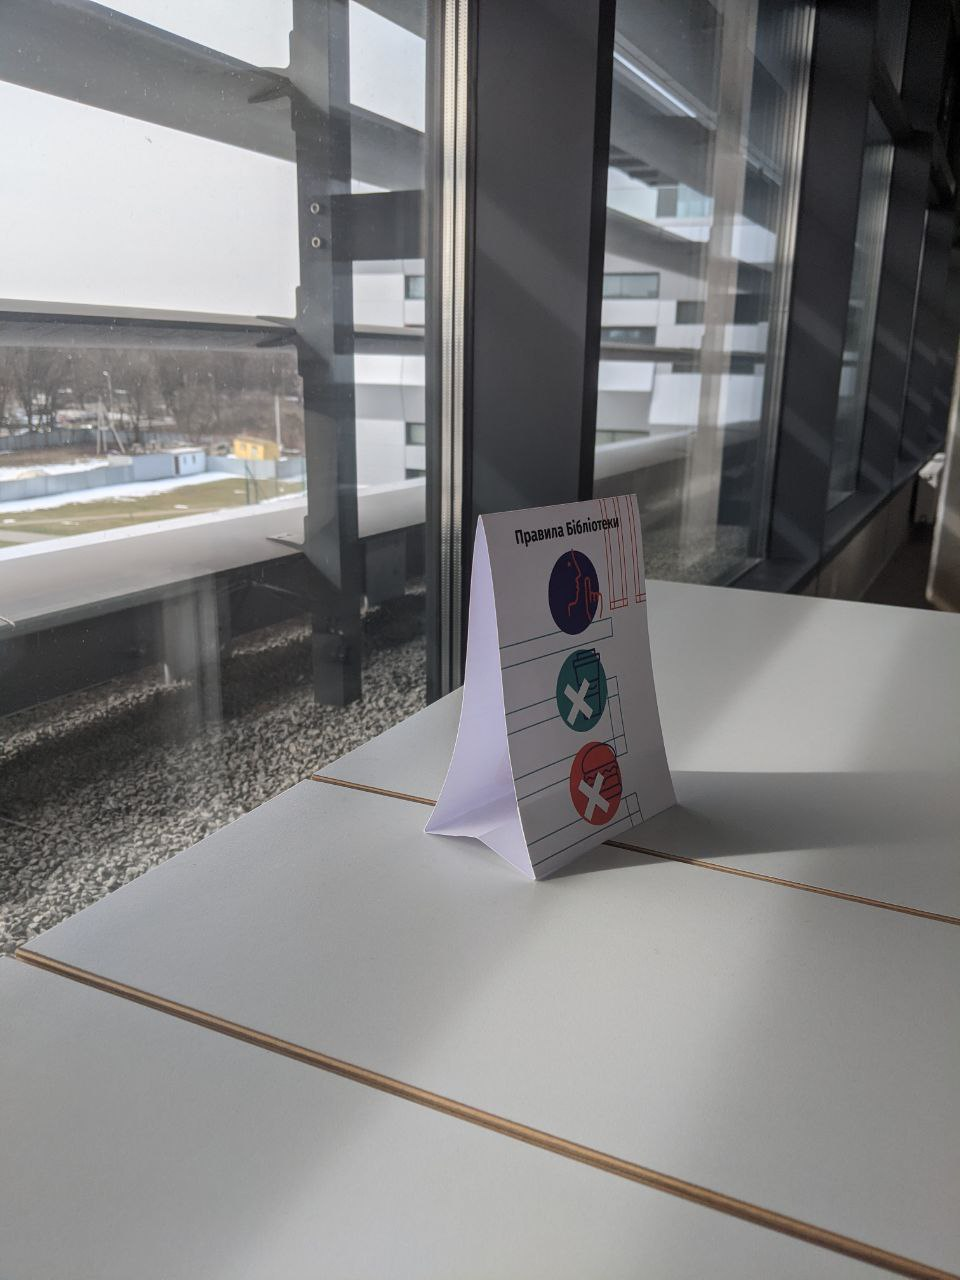

In [ ]:
##### YOUR CODE STARTS #####
img2_path = './img2.jpg'
##### YOUR CODE ENDS #####
image2 = cv.imread(img2_path)
cv2_imshow(image2)

Implement the function that constructs a perspective shift matrix and apply it to the image.

<ipython-input-128-a84e2350fd0d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result =  np.linalg.lstsq(A, b)[0]


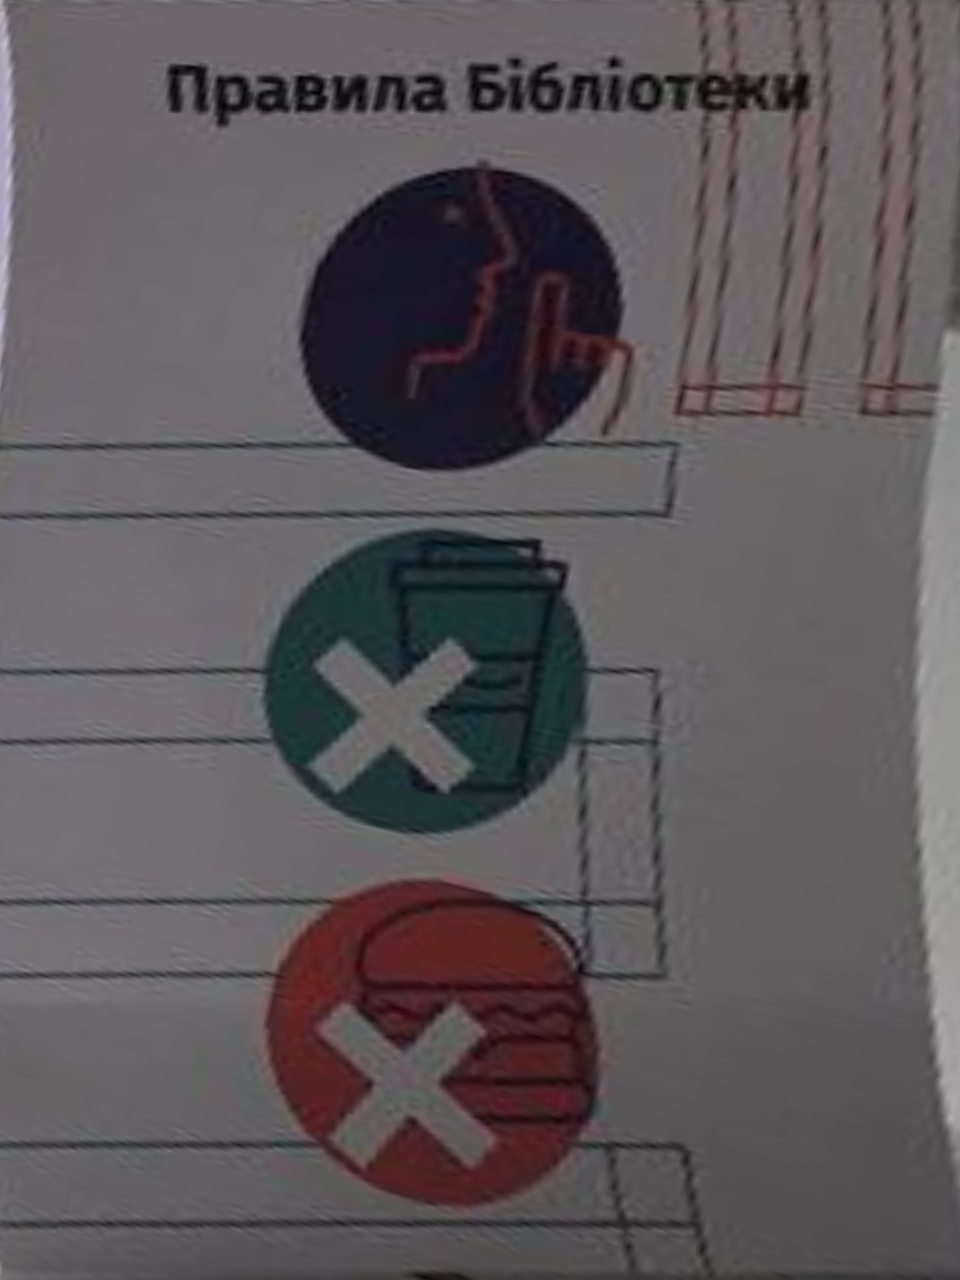

In [ ]:
##### YOUR CODE STARTS #####
def get_perspective_transform_matrix(source: np.array, destination: np.array):
  A = np.zeros((8, 8))
  b = np.zeros(8)
  for i in range(4):
    x_i, y_i = source[i]
    u_i, v_i = destination[i]
    A[2 * i] = [x_i, y_i, 1, 0, 0, 0, -u_i * x_i, -u_i * y_i]
    A[2 * i + 1] = [0, 0, 0, x_i, y_i, 1, -v_i * x_i, -v_i * y_i]
    b[2 * i] = u_i
    b[2 * i + 1] = v_i
  result =  np.linalg.lstsq(A, b)[0]
  return np.append(result, 1).reshape(3, 3)

rows,cols,ch = image2.shape

source_points = np.float32([[536, 880], [480, 515], [636, 495], [675, 805]])
destination_points = np.float32([[0, rows], [0, 0], [cols, 0], [cols, rows]])

perspective_shift_m = get_perspective_transform_matrix(source_points, destination_points)

transformed = cv.warpPerspective(image2, perspective_shift_m, (cols, rows))
cv2_imshow(transformed)
##### YOUR CODE ENDS #####

### 2.2 Composition of transformations

Apply the following transformations to the original image in the specified order and observe the results displayed side-by-side.

1) Scaling by $(1.5, 2)$, rotation by $18^\circ$ and translation by $(10, 15)$.  
2) Translation by $(10, 15)$, scaling by $(1.5, 2)$, rotation by $18^\circ$.

---------------------------
Scaling by  (1.5,2) , rotation by  18∘  and translation by  (10,15)
---------------------------


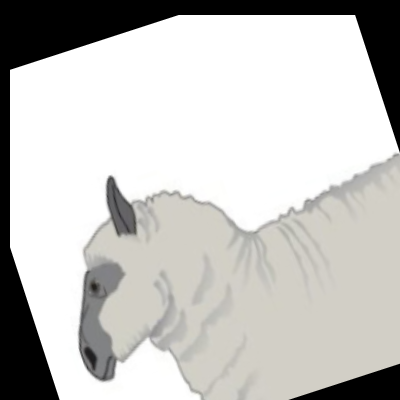

---------------------------
Translation by  (10,15) , scaling by  (1.5,2) , rotation by  18∘
---------------------------


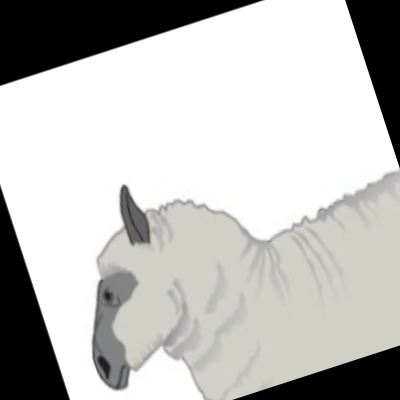

In [ ]:
print("---------------------------")
print("Scaling by  (1.5,2) , rotation by  18∘  and translation by  (10,15)")
print("---------------------------")

##### YOUR CODE STARTS #####
scaling_factors=(1.5, 2)
rotation_angle=18
translation=(10, 15)
# resized=image2
height, width = resized.shape[:2]
scaling_matrix=np.array([[scaling_factors[0], 0,0], [0,scaling_factors[1],0]])
scaled_matrix=cv.warpAffine(resized, scaling_matrix, (width, height))
rotation_matrix=cv.getRotationMatrix2D((width/2, height/2), rotation_angle, 1)
rotated_matrix=cv.warpAffine(scaled_matrix, rotation_matrix, (width, height))
translation_matrix= np.float32([[1,0, translation[0]], [0, 1, translation[1]]])
translated_matrix=cv.warpAffine(rotated_matrix, translation_matrix, (width, height))
cv.circle(translated_matrix, (495, 405), 25, (0,0,255),2)
cv2_imshow(translated_matrix)
##### YOUR CODE ENDS #####

print("---------------------------")
print("Translation by  (10,15) , scaling by  (1.5,2) , rotation by  18∘")
print("---------------------------")

##### YOUR CODE STARTS #####

translated_matrix_2= cv.warpAffine(resized, translation_matrix, (width, height))
scaled_matrix_2=cv.warpAffine(translated_matrix_2, scaling_matrix, (width, height))
rotated_matrix_2=cv.warpAffine(scaled_matrix_2, rotation_matrix, (width, height))
cv.circle(rotated_matrix_2, (495, 405), 25, (0,0,255),2)
cv2_imshow(rotated_matrix_2)

##### YOUR CODE ENDS #####

Do the outputs coincide? Is it possible to obtain same/different result changing the order of transformations? Which conditions should be met?

So the two output images do not coincide.

Two matrices commute, if $AB = BA$. For example, we take some general rotation matrix $A$ and shearing matrix $B$:

\begin{align*}
AB &= \begin{pmatrix}
\cos(\theta) -m\sin(\theta) & k\cos(\theta) -\sin(\theta)\\
\sin(\theta)+ m\cos(\theta) & k\sin(\theta)+ \cos(\theta)
\end{pmatrix}
BA&=\begin{pmatrix}
\cos(\theta) +k\sin(\theta) & k\cos(\theta) -\sin(\theta)\\
\sin(\theta)+ m\cos(\theta) & -m\sin(\theta)+ \cos(\theta)
\end{pmatrix}
\end{align*}

We can see that in general case they do not commute.

For example, we take some horizontal mirror matrix $A$ and scaling matrix $B$:

\begin{align*}
AB &= (BA) = \begin{pmatrix}
-a & 0 \\
0 & -b
\end{pmatrix}
BA&=
\begin{pmatrix}
-a & 0 \\
0 & -b
\end{pmatrix}
\end{align*}

So operations like scaling and horizontal mirror commute.

In general, every diagonal matrix commutes:

\begin{align*}
A &= \begin{pmatrix}
a_1 & 0 & \dots & 0 \\
0 & a_2 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & a_n
\end{pmatrix} \
B &= \begin{pmatrix}
b_1 & 0 & \dots & 0 \\
0 & b_2 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & b_n
\end{pmatrix}
\end{align*}
\begin{align*}
AB &= \begin{pmatrix}
a_1b_1 & 0 & \dots & 0 \\
0 & a_2b_2 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & a_nb_n
\end{pmatrix} \
BA &= \begin{pmatrix}
a_1b_1 & 0 & \dots & 0 \\
0 & a_2b_2 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & a_nb_n
\end{pmatrix}
\end{align*}

Also, the matrix multiplication of two matrices is commutative if $A$, $B$, and $A'B$ are symmetric. Proof:

\begin{align*}
(AB)^\top &= AB \\
B^\top*A^\top &= AB:[(AB)^\top=B^\top*A^\top] \\
AB &= BA
\end{align*}

So, it is possible to obtain the same result by changing the order of operations depending on the type of operation!

## Summary

To summarize everything you have learnt in this lab assignment, answer the questions below.

### What is a transformation matrix?

> Indented block



Transformation matrix is a matrix that transforms one vector into another vector.

$$TA=B$$

\begin{align*}
\begin{pmatrix}
a & b\\
c & d
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
&=\begin{pmatrix}
x'\\
y'
\end{pmatrix}
\end{align*}


\begin{align*}
T=
\begin{pmatrix}
a & b\\
c & d
\end{pmatrix}
\end{align*}

T - transformational matrix


### How its shape and values affect the resulting image? What is a shape of a typical transformation matrix that is applied to images; which factors affect its shape?

In linear transformation, a 2×2 matrix is used to do scaling, shearing, and rotating on a 2D vector $[x, y]$. But multiplying a 2D vector with a 2×2 matrix cannot achieve translation.

The elements in the first row control the transformation applied to the x-axis. While  elements in the second row - to the y-axis.

The general expression for affine transformation is $q= Ax + b$
That’s exactly what a 3×3 matrix can do, combining the multiplication with a 2×2 matrix and adding of a 2D vector into one multiplication with a 3×3 matrix!

\begin{align*}
\begin{pmatrix}
q_1\\
q_2 \\
1
\end{pmatrix}
&=
\begin{pmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
0& 0& 1
\end{pmatrix}
\begin{pmatrix}
x\\
y\\
1
\end{pmatrix}
\end{align*}

- The last row of the transformation matrix A [0,0,1] makes sure that the dots after transformation are still on the same z=1 plane.
- $a_{13}$ and $a_{23}$ determine how much the image is shifted along the x and y axes accordingly. They are actually the same as $b_{1}$  and $b_{2}$  in the 2D vector $q= Ax + b$.

It is worth noting the two 0s in position  $a_{31}$ and  $a_{32}$. They stay as 0 in Affine transformation. If either of them is none zero, the image will go out of the z=1 plane and when projected back to to the z=0 plane, it is no longer in the same shape. In that case, it is not an Affine Transformation anymore.



The values within  transformation matrices determine the transformation:

**Rotation values** in the matrix determine the angle and direction of rotation.

**Scaling factors** on the diagonal of the matrix determine how much the image is scaled along each axis.

The matrix associated with a stretch by a factor k along the x-axis is given by:
\begin{bmatrix}
k&0\\
0&1
\end{bmatrix}


The matrix associated with a stretch by a factor k along the y-axis is given by:
\begin{bmatrix}
1&0\\
0&k
\end{bmatrix}
**Shearing factors** affect the skewness of the image along each axis.

A shear parallel to the x-axis:
\begin{bmatrix}
1&k\\
0&1
\end{bmatrix}

A shear parallel to the y-axis:
\begin{bmatrix}
1&0\\
k&1
\end{bmatrix}


### What can be a result of composition of transformations?

The result of the composition of transformations is a single transformation that represents the combined effect of applying each individual transformation in sequence. In general, the result of composition of transformations depends on the order in which the individual transformations are applied, as well as the parameters of each individual transformation.

### What is a perspective shift transformation in terms of geometry?

Overall, perspective shift transformation helps us to "move" between different basis of the image. That means, if we have some picture and we want to create a an image from a different view on that picture, we can apply shift transformation, which consists of mapping a set of points in one image - the source image, to a corresponding set of points in another image - the destination image using transformation matrix.